## 3.1. 들어가며

## 3.2. 대회의 시작 (1) 참가 규칙, 평가 기준 살펴보기

## 3.3. 대회의 시작 (2) 데이터 살펴보기

## 3.4. 일단 제출하고 시작해! Baseline 모델 (1) Baseline 셋팅하기

In [1]:
import matplotlib.pyplot as plt

## 3.5. 일단 제출하고 시작해! Baseline 모델 (2) 라이브러리, 데이터 가져오기

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


## 3.6. 일단 제출하고 시작해! Baseline 모델 (3) 데이터 이해하기

In [4]:
data = pd.read_csv('03/data/train.csv')
sub = pd.read_csv('03/data/test.csv')
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6555, 20)


In [5]:
with pd.option_context('display.max_rows', 21, 'display.max_columns', None): 
    display(data)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
data['waterfront'].value_counts()

0    14928
1      107
Name: waterfront, dtype: int64

In [9]:
data['view'].value_counts()

0    13548
2      665
3      373
1      241
4      208
Name: view, dtype: int64

In [10]:
data['condition'].value_counts()

3    9793
4    3956
5    1155
2     110
1      21
Name: condition, dtype: int64

In [11]:
data['grade'].value_counts()

7     6228
8     4207
9     1855
6     1406
10     781
11     288
5      174
12      61
4       23
13       9
3        2
1        1
Name: grade, dtype: int64

In [12]:
data['yr_built'].value_counts()

2014    405
2006    325
2004    305
2005    302
2003    284
       ... 
1901     21
1933     20
1902     20
1935     19
1934     11
Name: yr_built, Length: 116, dtype: int64

In [13]:
data['yr_renovated'].value_counts()

0       14404
2014       71
2013       28
2007       25
2003       25
        ...  
1940        1
1950        1
1954        1
1948        1
1944        1
Name: yr_renovated, Length: 65, dtype: int64

In [14]:
y = data['price']
del data['price']

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [15]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
print(data.shape)
print(sub.shape)

(15035, 20)
(6555, 20)


In [17]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21590


In [18]:
print(data.shape)

(21590, 20)


In [19]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


<AxesSubplot:>

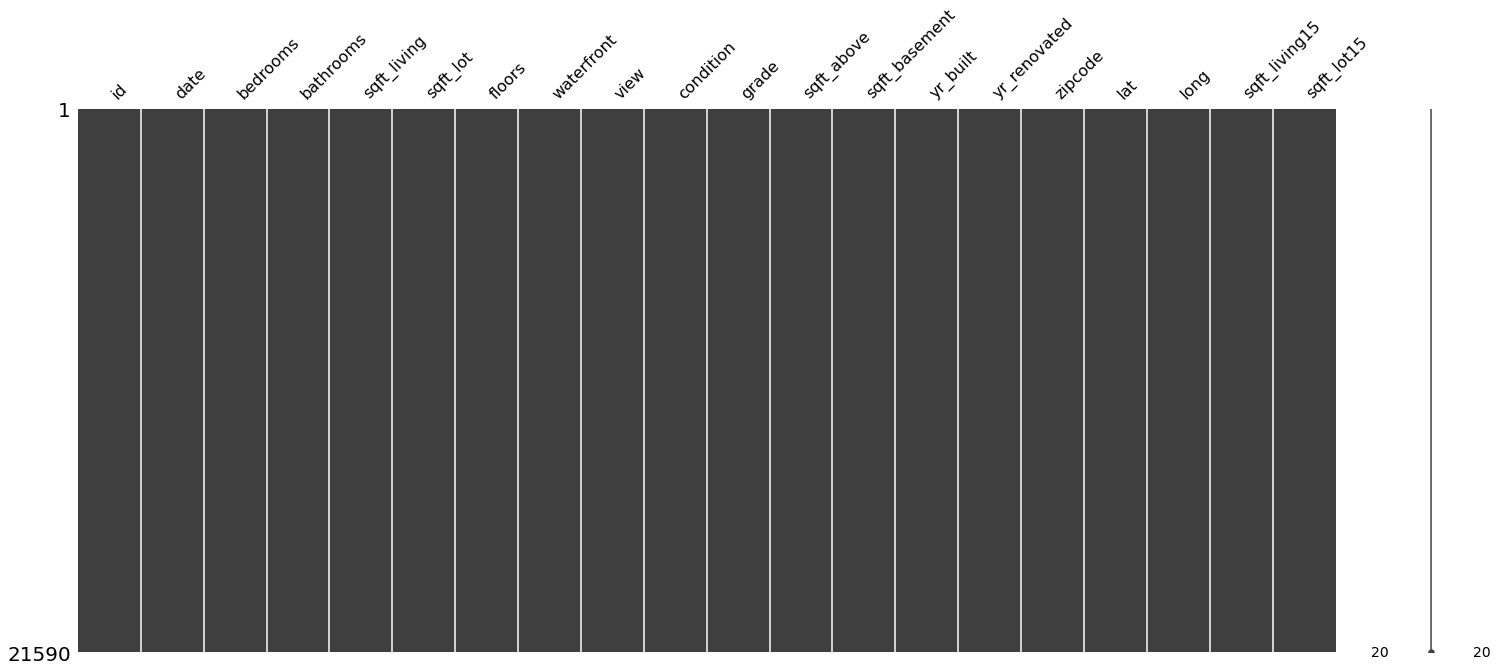

In [20]:
msno.matrix(data)

In [21]:
# 1. id 컬럼이 결측치인지 확인합니다.
null_check = pd.isnull(data['id'])
print(null_check)

0       False
1       False
2       False
3       False
4       False
        ...  
6550    False
6551    False
6552    False
6553    False
6554    False
Name: id, Length: 21590, dtype: bool


In [22]:
# 2. 결측치인 데이터만 뽑아냅니다.
null_data = data.loc[null_check, 'id']
null_data.head()

Series([], Name: id, dtype: int64)

In [23]:
print(type(data['id']))
print(type(null_check))
print(type(null_data))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
# 3. 결측치인 데이터의 개수를 셉니다.
print('{}: {}'.format('id', len(null_data.values)))

id: 0


In [25]:
# 한 번에 뿅!
print('{} : {}'.format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

id : 0


In [26]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [27]:
print(data['id'][:train_len])
print(data['id'][train_len:])
print(len(data['id'][:train_len]))
print(len(data['id'][train_len:]))

0            0
1            1
2            2
3            3
4            4
         ...  
15030    15030
15031    15031
15032    15032
15033    15033
15034    15034
Name: id, Length: 15035, dtype: int64
0       15208
1       15209
2       15210
3       15211
4       15212
        ...  
6550    21758
6551    21759
6552    21760
6553    21761
6554    21762
Name: id, Length: 6555, dtype: int64
15035
6555


In [28]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [29]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [30]:
len(data.columns)

19

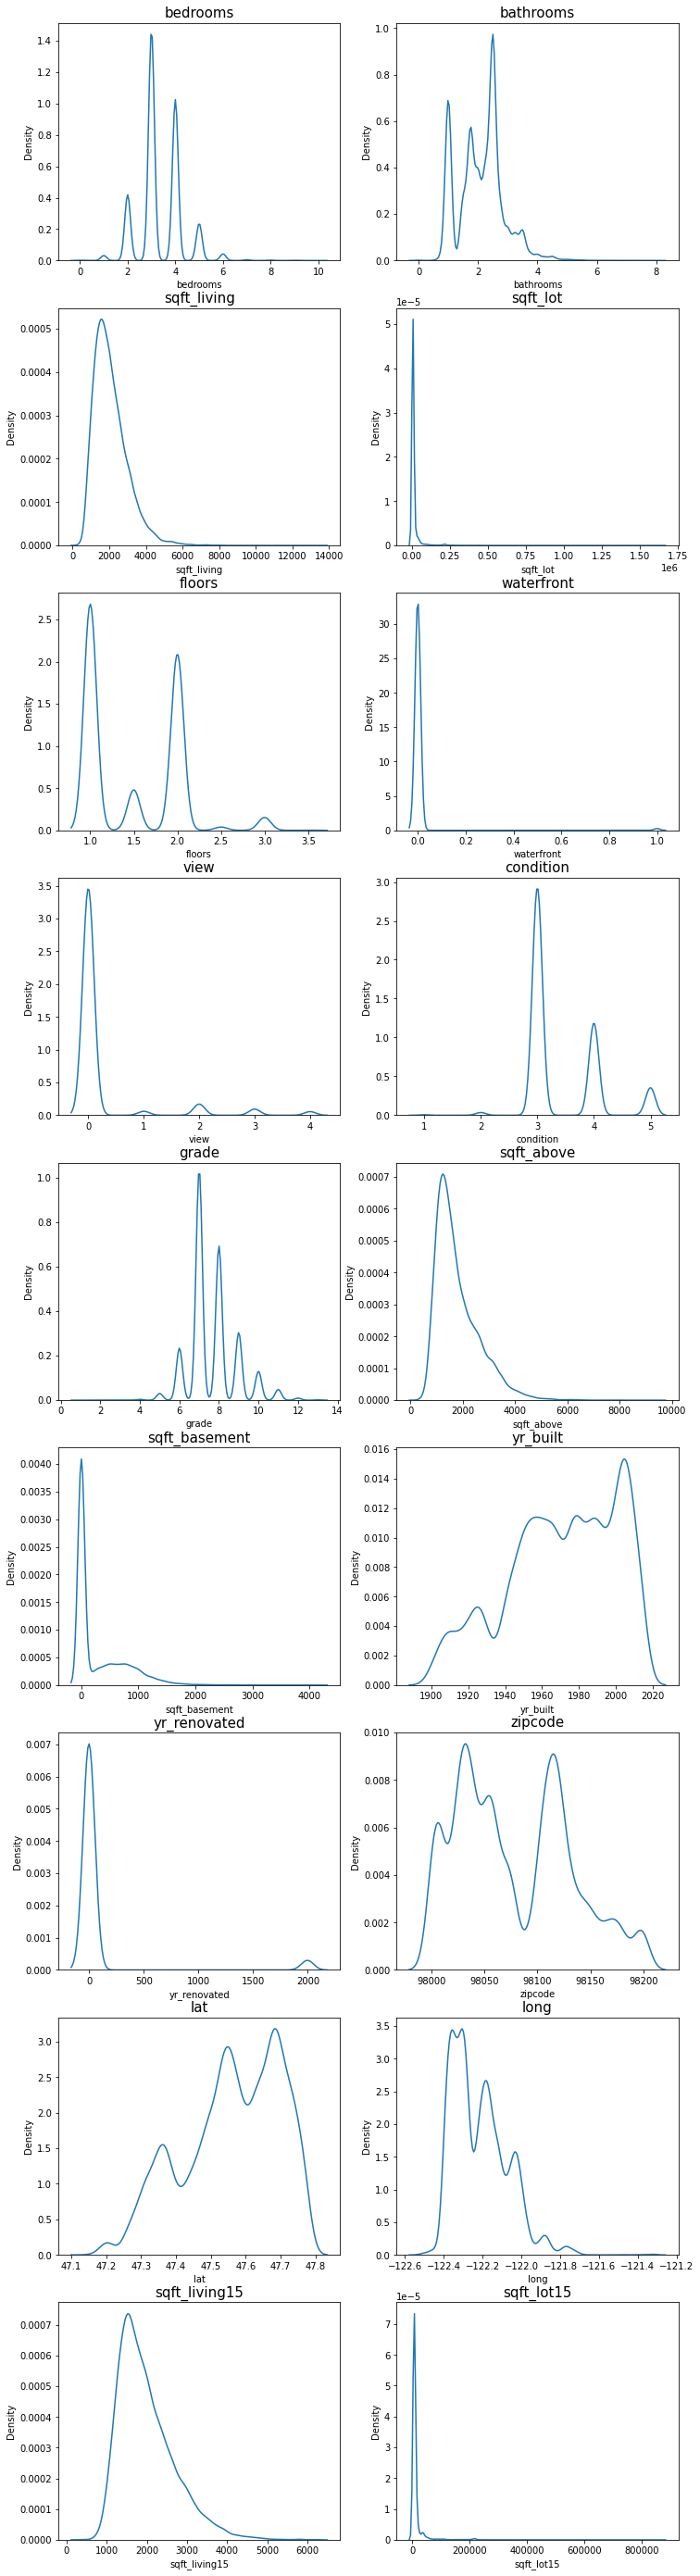

In [31]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

https://github.com/govin08/aiffel/blob/master/004_articles_and_materials/0916_seaborn.kdeplot.ipynb
 - KDE : kernel density estimation
 - kdeplot
 
 에 대한 설명

In [32]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

print('얍💢')

얍💢


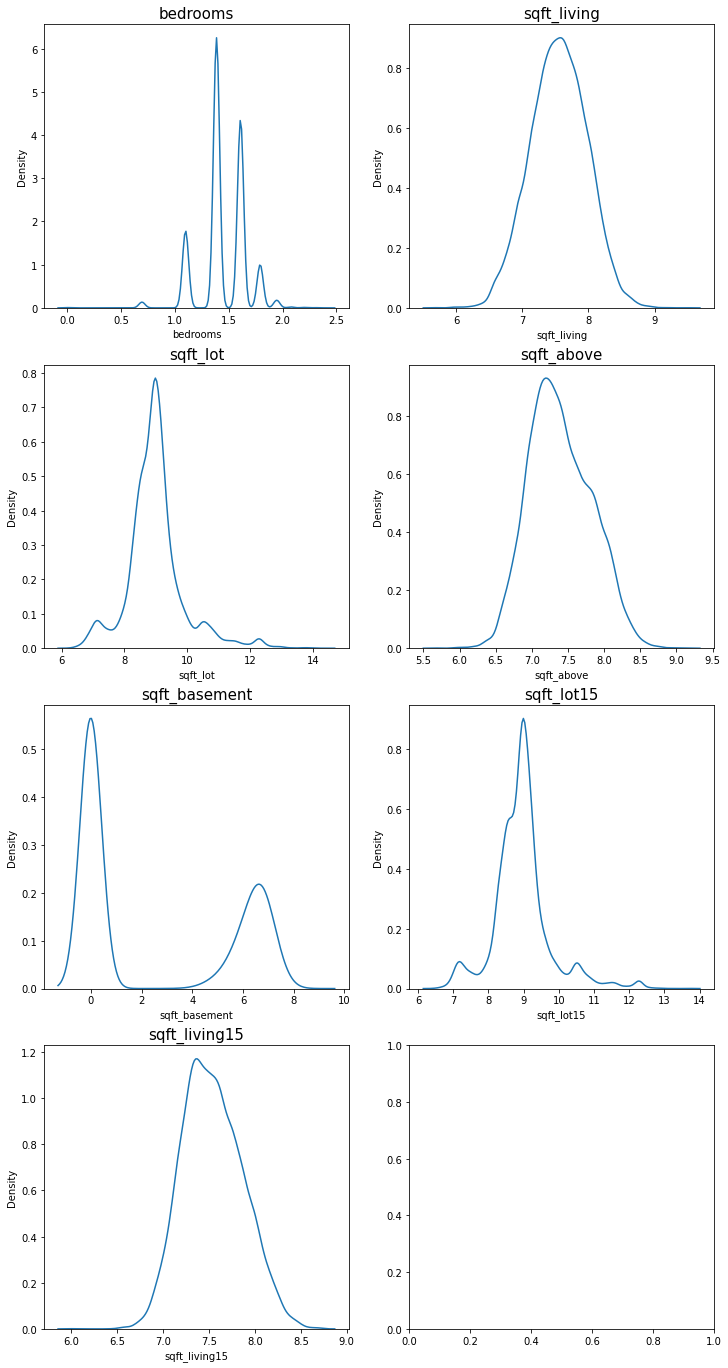

In [33]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

In [34]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6555, 19)


## 3.7. 일단 제출하고 시작해! Baseline 모델 (4) 모델 설계

**Q4. 앙상블이란 무엇이고, 어떤 아이디어로부터 착안된 기법인가요?**

앙상블은, 여러 개의 모델(voting and averaging) 혹은 여러 종류의 데이터셋을 사용하여(bagging), 혹은 일련의 모델들을 순차적으로 사용하여(boosting) 학습하는 방법입니다.

**Q5. 앙상블 기법 중 가장 기본적인 것은 보팅(Voting)과 에버리징(Averaging)입니다. 각각은 무엇이고, 언제 쓰이나요?**

**voting** : classification에서 사용합니다.
아래는 majority voting (hard voting) 의 한 예시입니다.

라벨의 개수가 3개인 classification 문제를 가정하겠습니다.
라벨들은 각각 $0,1,2$라고 하겠습니다.
서로 다른 일곱 개의 모델들 $M_1$, $M_2$, $M_3$, $M_4$, $M_5$, $M_6$, $M_7$이 있을 때,
$M_j$들을 독립적으로 학습시킵니다.
각각의 모델 $M_j$들은 하나의 입력값 $x$에 대하여 서로 다른 일곱 개의 예측값 $M_j(x)$을 냅니다.

|        |$M_1$|$M_2$|$M_3$|$M_4$|$M_5$|$M_6$|$M_7$|
|:-:     |:-:  |:-:  |:-:  |:-:  |:-:  |:-:  |:-:  |
|$M_i(x)$|0    |1    |1    |0    |1    |1    |2    |

그러면 새로운 앙상블 모델 $M$은 $x$에 대한 예측값을 1로 예측합니다.
1이 가장 많이 나왔기 때문입니다.

$$M(x) = 1$$

**averaging** : regression에서 사용합니다.
아래는 simple averaging의 한 예시입니다.

regression 문제를 가정하겠습니다.
즉, 모델은 하나의 실수값을 예측하게 됩니다.
서로 다른 일곱 개의 모델들 $M_1$, $M_2$, $M_3$, $M_4$, $M_5$, $M_6$, $M_7$이 있을 때,
$M_j$들을 독립적으로 학습시킵니다.
각각의 모델 $M_j$들은 하나의 입력값 $x$에 대하여 서로 다른 일곱 개의 예측값 $M_j(x)$을 냅니다.

|        |$M_1$|$M_2$|$M_3$|$M_4$|$M_5$|$M_6$|$M_7$|
|:-:     |:-:  |:-:  |:-:  |:-:  |:-:  |:-:  |:-:  |
|$M_i(x)$|5    |4    |1    |10   |4    |5    |6    |

그러면 새로운 앙상블 모델 $M$은 $x$에 대한 예측값을 5로 예측합니다.
이것은 각 모델들의 예측치에 평균을 낸 값입니다.

$$M(x) = \frac{5+4+1+10+4+5+6}7=5$$

**Q6. 각각 성능이 70%(0.7)인 다섯 개의 분류기가 있다고 가정합니다.
이 때 이 다섯 개의 모델이 예측한 결과에 다수결 투표를 진행하여 최종 결과를 결정한다면 예상 정확도는 얼마일까요?
(힌트: 고등학생 때 배웠던 순열과 조합의 독립시행의 확률을 떠올려보세요!)**

다섯 개의 모델 중 세 개 이상의 모델이 답을 맞추면, 앙상블 모델은 답을 맞추게 됩니다.
정확히 말하면, 다섯 개의 모델 중 두 개의 모델이 답을 맞췄다고 하더라도 앙상블 모델이 답을 맞출 수도 있지만, 일단은 세 개 이상의 모델이 답을 맞추는 경우만 고려하겠습니다.

다섯 개의 모델 중 답을 맞춘 모델의 수를 $X$라고 하면, 다섯 개의 모델 중 세 개 이상의 모델이 답을 맞출 확률은 $P(X\ge3)$이고, 이것은 다시

$$P(X\ge3) = P(X=3)+P(X=4)+P(X=5)$$

와 같이 쓸 수 있습니다.
각각은

\begin{align*}
P(X=3)&=_5C_3\times0.7^3\times0.3^2\\
P(X=4)&=_5C_4\times0.7^4\times0.3^1\\
P(X=5)&=_5C_5\times0.7^5\times0.3^0
\end{align*}

이 되어
$P(X\ge3) = 0.83691$입니다.

In [35]:
import scipy.special

def P(x):
    return scipy.special.comb(5,x)*0.7**x*0.3**(5-x)
P(3)+P(4)+P(5)

0.8369199999999998

In [36]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


In [37]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('얍💢')

얍💢


In [38]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


In [39]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢


In [40]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6555


array([1361676.91242777,  308900.55888961,  786583.53874638, ...,
       1693771.62246729,  415635.76190782,  341572.97685942])

In [41]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [42]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

,id,price
0,15208,1.361677e+06
1,15209,3.089006e+05
2,15210,7.865835e+05
3,15211,2.143299e+05
4,15212,4.413795e+05


In [43]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission.csv


## 3.8. 일단 제출하고 시작해! Baseline 모델 (5) 캐글에 첫 결과 제출하기

## 3.9. 랭킹을 올리고 싶다면? (1) 다시 한 번, 내 입맛대로 데이터 준비하기

In [44]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('얍💢')

얍💢


In [45]:
print(train.shape)
print(test.shape)

(15035, 21)
(6468, 20)


In [46]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [47]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [48]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [49]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [50]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [51]:
print(train.shape)
print(test.shape)

(15035, 19)
(6468, 19)


In [52]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

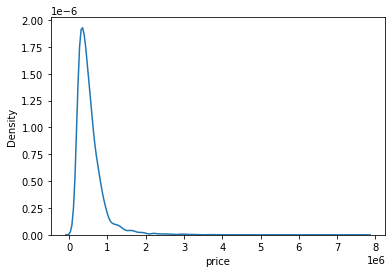

In [53]:
sns.kdeplot(data = y, bw_adjust = 1)

In [54]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

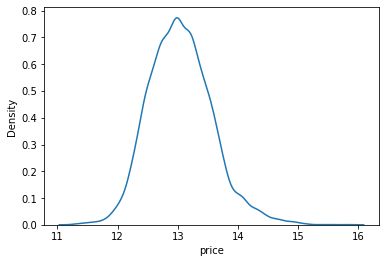

In [55]:
sns.kdeplot(y)
plt.show()

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## 3.10. 랭킹을 올리고 싶다면? (2) 다양한 실험을 위해 함수로 만들어 쓰자

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


In [58]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('얍💢')

얍💢


In [59]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


In [60]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


In [61]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [70]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
score_df

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


In [68]:
df.keys()

dict_keys(['GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor', 'RandomForestRegressor'])

In [69]:
df.values()

dict_values([128360.19649691365, 110318.66956616656, 111920.36735892233, 125487.07102453562])

In [75]:
# revisited
df = {}
for model in models:
    model_name = model.__class__.__name__
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df[model_name] = rmse(y_test, y_pred)
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE',ascending = False)
score_df

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


In [77]:
random_state=2020
# a simplified version of the previous cell
def get_scores(models, train, y):
    df = {}
    for model in models:
        model_name = model.__class__.__name__
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE',ascending = False)
    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125487.071025
LGBMRegressor,111920.367359
XGBRegressor,110318.669566


## 3.11. 랭킹을 올리고 싶다면? (3) 하이퍼 파라미터 튜닝의 최강자, 그리드 탐색

In [78]:
from sklearn.model_selection import GridSearchCV

print('얍💢')

얍💢


In [79]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [80]:
model = LGBMRegressor(random_state=random_state)

print('얍💢')

얍💢


In [81]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [82]:
grid_model.cv_results_

{'mean_fit_time': array([1.08498096, 1.3549077 , 2.31385555, 3.64865217]),
 'std_fit_time': array([0.12344898, 0.1210366 , 0.12804439, 0.19980223]),
 'mean_score_time': array([0.08213005, 0.10149002, 0.16410604, 0.20537186]),
 'std_score_time': array([0.00175716, 0.00604655, 0.01872806, 0.0577406 ]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [83]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [84]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [94]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


**Q11. GridSearchCV 에서 모델을 초기화할 때 scoring 인자에는 무엇을 넣었나요?**

`neg_mean_squared_error`를 넣었습니다.

[이곳](https://scikit-learn.org/stable/modules/model_evaluation.html)에 따르면, `model_selection.GridSearchCV`를 사용할 때, `scoring` parameter가 등장하게 되는데 **높은 값을 가지는 것을 더 좋은 것으로 평가한다**는 관습을 따른다고 되어 있습니다.
원문은 다음과 같습니다.

> Model selection and evaluation using tools, such as `model_selection.GridSearchCV` and `model_selection.cross_val_score`, take a `scoring parameter` that controls what metric they apply to the estimators evaluated.
> For the most common use cases, you can designate a scorer object with the `scoring parameter`
All scorer objects follow the convention that **higher return values are better than lower return values.**
Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as `neg_mean_squared_error` which return the negated value of the metric.

In [95]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [96]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [98]:
results.sort_values(by = 'RMSLE')

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


In [99]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results



## 3.12. 랭킹을 올리고 싶다면? (4) 제출하는 것도, 빠르고 깔끔하게!

In [100]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


In [101]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

In [102]:
prediction = np.expm1(prediction)
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

In [103]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [104]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.067667e+05
1,15036,4.795061e+05
2,15037,1.345155e+06
3,15038,3.122579e+05
4,15039,3.338645e+05


In [105]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [106]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))


In [107]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!
[CV] END .......................max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   2.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.9s
[CV] END ......................max_depth=1, n_estimators=100; total time=   1.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   1.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=   2.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   1.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   1.7s
[CV] END ....................

## 3.13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!

## 3.14. 프로젝트 제출